**NOTEBOOK FOR IN DEPTH ANALYSIS OF RUNNING DATA**

Author : Andrea Valente

Date: June, 2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns
from pandas.plotting import scatter_matrix

same general stats as in java project +
* histogram of pace
* ml model to predict performance (you will have to find an indicator of good performance)

# Helper functions

In [2]:
def list_element_to_int(my_list:list):
    """
    returns elements of a list as integers
    """
    try:
        res = [int(x) for x in my_list]
        if len(res) > 2:
            return res[0] * 3600 + res[1] * 60 + res[2]
        else:
            return res[0] * 60 + res[1]
    except Exception as e:
        return np.nan

In [3]:
def hms_to_secs(time: pd.Series):
    """
    Converts time in the h:m:s format to seconds using the list_element_to_int fun
    """
    temp = time.apply(lambda x: x.split('.')[0]) # remove decimals (all after .)  
    temp2 = temp.str.split(':')
    return temp2.apply(lambda x: list_element_to_int(x))

How to write a function that takes a string and can be applied to pandas Series (df column)

# Load data

In [4]:
rundata = pd.read_csv('D:/PycharmProjectsDD/NewRunAnalyzer/data/Activities.csv')
print('Shape of running dataset: ' + str(rundata.shape))

Shape of running dataset: (402, 41)


In [5]:
rundata.head()

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Total Ascent,Total Descent,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Avg Ground Contact Time,Avg Run Cadence.1,Max Run Cadence.1,Training Stress Score®,Avg Power,Max Power,Grit,Flow,Avg. Swolf,Avg Stroke Rate,Total Reps,Dive Time,Min Temp,Surface Interval,Decompression,Best Lap Time,Number of Laps,Max Temp,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Running,2022-11-14 18:13:28,False,Reading - Stride Repeats,6.09,441,00:40:52,151,171,3.6,152,234,6:43,3:51,13,17,0.98,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0:00,0.0,0:00,No,00:01.58,27,0.0,00:40:47,00:40:59,28,44
1,Running,2022-11-12 15:19:44,False,Reading - Easy Run,4.70,334,00:30:00,158,185,3.5,157,163,6:23,5:54,5,11,1.00,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0:00,0.0,0:00,No,03:31.35.2,6,0.0,00:29:56,00:30:02,25,50
2,Running,2022-11-09 18:05:24,False,Reading - Easy Run,4.64,334,00:30:00,161,177,3.3,156,163,6:28,5:39,6,11,0.99,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0:00,0.0,0:00,No,03:21.70.1,6,0.0,00:29:58,00:30:00,35,53
3,Running,2022-11-07 17:35:51,False,Reading - Easy Run,4.95,365,00:30:00,164,185,3.8,159,167,6:04,5:05,3,7,1.04,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0:00,0.0,0:00,No,03:54.11.7,6,0.0,00:29:59,00:30:00,34,55
4,Running,2022-11-04 18:23:25,False,Appiano Gentile - Easy Run,7.51,576,00:50:00,161,182,4.0,156,167,6:39,5:30,32,39,0.96,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0:00,0.0,0:00,No,03:04.89.5,9,0.0,00:49:57,00:50:00,331,348


# Prepare and analyze

## Set columns

In [6]:
cols = ['Date','Title', 'Distance', 'Calories',
       'Time', 'Avg HR', 'Max HR', 'Avg Run Cadence',
       'Max Run Cadence', 'Avg Pace', 'Best Pace', 'Total Ascent',
       'Total Descent', 'Avg Stride Length',
       'Best Lap Time', 'Moving Time',
       'Elapsed Time', 'Min Elevation', 'Max Elevation'] #'Aerobic TE',

In [7]:
rundata = rundata[cols]

In [8]:
rundata.head()

,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Total Ascent,Total Descent,Avg Stride Length,Best Lap Time,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,2022-11-14 18:13:28,Reading - Stride Repeats,6.09,441,00:40:52,151,171,152,234,6:43,3:51,13,17,0.98,00:01.58,00:40:47,00:40:59,28,44
1,2022-11-12 15:19:44,Reading - Easy Run,4.70,334,00:30:00,158,185,157,163,6:23,5:54,5,11,1.00,03:31.35.2,00:29:56,00:30:02,25,50
2,2022-11-09 18:05:24,Reading - Easy Run,4.64,334,00:30:00,161,177,156,163,6:28,5:39,6,11,0.99,03:21.70.1,00:29:58,00:30:00,35,53
3,2022-11-07 17:35:51,Reading - Easy Run,4.95,365,00:30:00,164,185,159,167,6:04,5:05,3,7,1.04,03:54.11.7,00:29:59,00:30:00,34,55
4,2022-11-04 18:23:25,Appiano Gentile - Easy Run,7.51,576,00:50:00,161,182,156,167,6:39,5:30,32,39,0.96,03:04.89.5,00:49:57,00:50:00,331,348


In [9]:
#rundata.Title.value_counts()

## Check data types

In [10]:
rundata.dtypes

Date                  object
Title                 object
Distance             float64
Calories              object
Time                  object
Avg HR                 int64
Max HR                 int64
Avg Run Cadence        int64
Max Run Cadence        int64
Avg Pace              object
Best Pace             object
Total Ascent          object
Total Descent         object
Avg Stride Length    float64
Best Lap Time         object
Moving Time           object
Elapsed Time          object
Min Elevation         object
Max Elevation         object
dtype: object

In [11]:
rundata['Short_date'] = rundata['Date'].str[0:10]

In [12]:
rundata['Date'] = pd.to_datetime(rundata['Date'], infer_datetime_format=True)

In [13]:
rundata.sort_values(by=['Date'],inplace=True)

In [14]:
rundata['Calories'] = rundata['Calories'].replace(',','',regex=True).astype(int)

## Add new columns

In [15]:
rundata['Distance_in_miles'] = (rundata['Distance'] / 1.609344)

In [16]:
rundata['Time_in_secs'] = hms_to_secs(rundata['Time'])

In [17]:
rundata['Avg_pace_secs'] = hms_to_secs(rundata['Avg Pace'])  

In [18]:
rundata['Best_pace_secs'] = hms_to_secs(rundata['Best Pace'])  

In [19]:
rundata['Hour_of_day'] = rundata['Date'].dt.hour

In [20]:
rundata['Month'] = rundata['Date'].dt.month.astype(str)

In [21]:
rundata['Month_Year'] = rundata['Date'].dt.to_period('M')

In [22]:
rundata['Day_of_week'] = rundata['Date'].dt.dayofweek

In [23]:
rundata['Short_date'] = pd.to_datetime(rundata['Short_date'])

In [24]:
# moving averages pace
rundata['Pace_MA_7'] = rundata['Avg_pace_secs'].rolling(7).mean()
rundata['Pace_MA_30'] = rundata['Avg_pace_secs'].rolling(30).mean()

In [25]:
# moving averages distance
rundata['Distance_MA_7'] = rundata['Distance'].rolling(7).mean()
rundata['Distance_MA_30'] = rundata['Distance'].rolling(30).mean()
rundata['Distance_MA_60'] = rundata['Distance'].rolling(60).mean()

In [26]:
# heart rate moving averages
rundata['Avg_HR_MA_7'] = rundata['Avg HR'].rolling(7).mean()
rundata['Avg_HR_MA_30'] = rundata['Avg HR'].rolling(30).mean()
rundata['Avg_HR_MA_60'] = rundata['Avg HR'].rolling(60).mean()

In [27]:
rundata.head(2)

,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Total Ascent,Total Descent,Avg Stride Length,Best Lap Time,Moving Time,Elapsed Time,Min Elevation,Max Elevation,Short_date,Distance_in_miles,Time_in_secs,Avg_pace_secs,Best_pace_secs,Hour_of_day,Month,Month_Year,Day_of_week,Pace_MA_7,Pace_MA_30,Distance_MA_7,Distance_MA_30,Distance_MA_60,Avg_HR_MA_7,Avg_HR_MA_30,Avg_HR_MA_60
401,2020-10-11 13:19:38,Appiano Gentile Corsa,0.85,61,00:05:00.0,150,173,160,164,5:55,4:24,--,17,1.06,05:00.02.3,00:04:59,00:05:00.0,339,357,2020-10-11,0.528166,300,355,264,13,10,2020-10,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,2020-10-11 13:27:38,Appiano Gentile Corsa,0.79,62,00:05:00.4,153,167,158,160,6:19,5:35,5,7,1.00,05:00.37.7,00:04:59,00:05:00.4,339,346,2020-10-11,0.490883,300,379,335,13,10,2020-10,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
rundata.sort_values(by =['Date'],inplace=True)

In [29]:
rundata.reset_index(drop=True,inplace=True)

In [30]:
rundata.head(2)

,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Total Ascent,Total Descent,Avg Stride Length,Best Lap Time,Moving Time,Elapsed Time,Min Elevation,Max Elevation,Short_date,Distance_in_miles,Time_in_secs,Avg_pace_secs,Best_pace_secs,Hour_of_day,Month,Month_Year,Day_of_week,Pace_MA_7,Pace_MA_30,Distance_MA_7,Distance_MA_30,Distance_MA_60,Avg_HR_MA_7,Avg_HR_MA_30,Avg_HR_MA_60
0,2020-10-11 13:19:38,Appiano Gentile Corsa,0.85,61,00:05:00.0,150,173,160,164,5:55,4:24,--,17,1.06,05:00.02.3,00:04:59,00:05:00.0,339,357,2020-10-11,0.528166,300,355,264,13,10,2020-10,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-10-11 13:27:38,Appiano Gentile Corsa,0.79,62,00:05:00.4,153,167,158,160,6:19,5:35,5,7,1.00,05:00.37.7,00:04:59,00:05:00.4,339,346,2020-10-11,0.490883,300,379,335,13,10,2020-10,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Fix dtypes

In [31]:
rundata.dtypes

Date                 datetime64[ns]
Title                        object
Distance                    float64
Calories                      int32
Time                         object
Avg HR                        int64
Max HR                        int64
Avg Run Cadence               int64
Max Run Cadence               int64
Avg Pace                     object
Best Pace                    object
Total Ascent                 object
Total Descent                object
Avg Stride Length           float64
Best Lap Time                object
Moving Time                  object
Elapsed Time                 object
Min Elevation                object
Max Elevation                object
Short_date           datetime64[ns]
Distance_in_miles           float64
Time_in_secs                  int64
Avg_pace_secs                 int64
Best_pace_secs                int64
Hour_of_day                   int64
Month                        object
Month_Year                period[M]
Day_of_week                 

In [32]:
rundata['Hour_of_day'] = rundata['Hour_of_day'].astype(str)
rundata['Day_of_week'] = rundata['Day_of_week'].astype(str)

Min/Max elevation have "--" when not available. We need to replace them before converting to int

In [33]:
rundata['Min Elevation'].unique()

array(['339', '338', '39', '40', '38', '36', '342', '341', '332', '334',
       '340', '35', '34', '1', '6', '-1', '33', '11', '29', '333', '331',
       '30', '175', '4', '--', '32', '26', '330', '37', '31', '28', '20',
       '21', '25', '24', '-44', '174', '169', '147', '161', '14', '15'],
      dtype=object)

In [34]:
rundata['Total Descent'].unique()

array(['17', '7', '2', '18', '8', '9', '33', '4', '--', '3', '6', '1',
       '5', '11', '10', '15', '12', '16', '0', '13', '19', '21', '20',
       '23', '25', '22', '24', '26', '41', '27', '34', '42', '32', '44',
       '55', '36', '47', '30', '14', '43', '49', '37', '39', '29', '60',
       '35', '45', '31', '28', '64', '61', '54', '38', '50', '56', '53',
       '117', '52', '77', '72', '66', '57', '40', '74', '94', '87', '73',
       '81', '112', '48'], dtype=object)

In [35]:
rundata['Max Elevation'].unique()

array(['357', '346', '341', '356', '347', '349', '42', '43', '44', '45',
       '40', '46', '348', '350', '358', '47', '48', '52', '58', '51',
       '84', '60', '53', '54', '70', '65', '14', '26', '27', '57', '77',
       '64', '63', '50', '71', '49', '61', '68', '59', '87', '365', '351',
       '91', '56', '67', '72', '188', '36', '38', '37', '66', '69', '120',
       '62', '106', '55', '79', '78', '92', '75', '83', '95', '--', '73',
       '76', '88', '182', '183', '187', '186', '10', '31', '24', '33',
       '32', '184'], dtype=object)

In [36]:
rundata['Min Elevation'] =rundata['Min Elevation'].replace("--",0)
rundata['Max Elevation'] =rundata['Max Elevation'].replace("--",0)

In [37]:
rundata['Min Elevation'] = rundata['Min Elevation'].astype(int)
rundata['Max Elevation'] = rundata['Max Elevation'].astype(int)

In [38]:
rundata['Total Descent'] = rundata['Total Descent'].replace("--",0)
rundata['Total Descent'] = rundata['Total Descent'].astype(int)

## List descriptive columns to facilitate visualization

In [39]:
desc_cols = ['Distance','Avg HR','Total Descent','Max HR','Avg Run Cadence','Max Run Cadence','Avg Stride Length',
            'Time_in_secs','Avg_pace_secs','Hour_of_day','Calories','Best_pace_secs']

## Check correlations

In [40]:
corr = rundata[desc_cols].corr(method='pearson')

In [41]:
corr.style.background_gradient(cmap='coolwarm')

,Distance,Avg HR,Total Descent,Max HR,Avg Run Cadence,Max Run Cadence,Avg Stride Length,Time_in_secs,Avg_pace_secs,Calories,Best_pace_secs
Distance,1.000000,0.262555,0.518621,0.277700,-0.128812,0.050322,-0.492474,0.994492,0.488405,0.988259,0.390914
Avg HR,0.262555,1.000000,0.074288,0.841476,0.036416,-0.175300,-0.308625,0.262145,0.229562,0.338882,0.250184
Total Descent,0.518621,0.074288,1.000000,0.115177,-0.088223,0.111445,-0.280176,0.514402,0.302214,0.508648,0.126703
Max HR,0.277700,0.841476,0.115177,1.000000,-0.005131,-0.112563,-0.280537,0.268056,0.211477,0.340620,0.252461
Avg Run Cadence,-0.128812,0.036416,-0.088223,-0.005131,1.000000,-0.000767,0.247190,-0.169406,-0.568117,-0.122554,-0.048173
Max Run Cadence,0.050322,-0.175300,0.111445,-0.112563,-0.000767,1.000000,0.256950,0.020678,-0.217428,0.018696,-0.343173
Avg Stride Length,-0.492474,-0.308625,-0.280176,-0.280537,0.247190,0.256950,1.000000,-0.540121,-0.914334,-0.540867,-0.413845
Time_in_secs,0.994492,0.262145,0.514402,0.268056,-0.169406,0.020678,-0.540121,1.000000,0.550528,0.989699,0.403072
Avg_pace_secs,0.488405,0.229562,0.302214,0.211477,-0.568117,-0.217428,-0.914334,0.550528,1.000000,0.533118,0.370585
Calories,0.988259,0.338882,0.508648,0.340620,-0.122554,0.018696,-0.540867,0.989699,0.533118,1.000000,0.402576


## Plot correlations

In [42]:
corr_cols = ['Distance','Avg HR','Avg Run Cadence','Avg Stride Length',
            'Time_in_secs','Avg_pace_secs','Calories','Best_pace_secs']

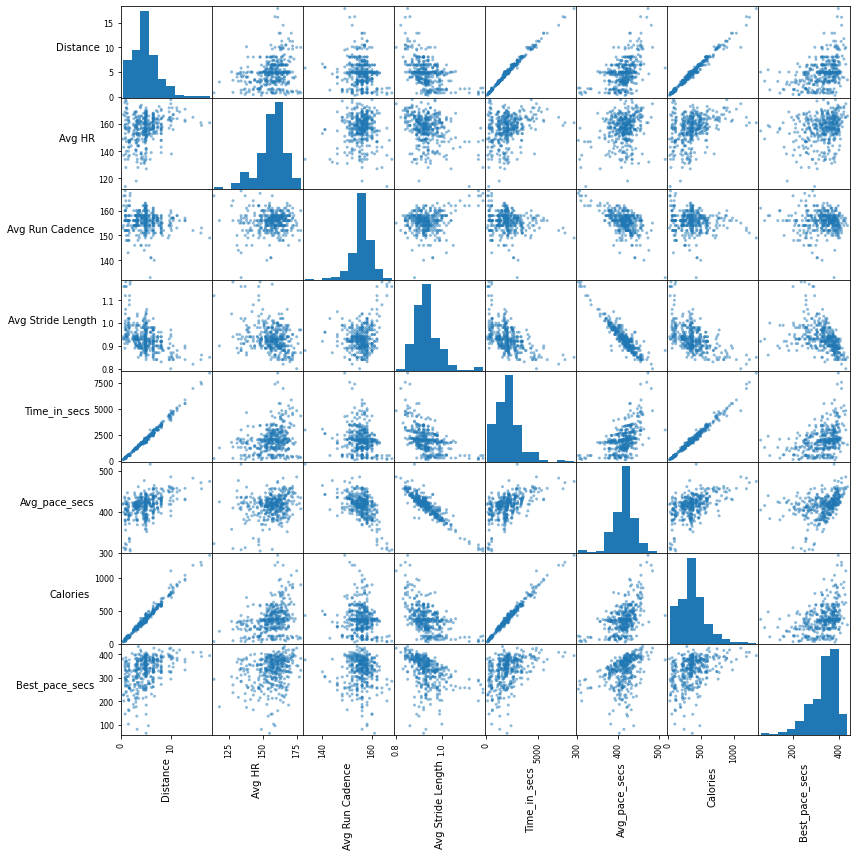

In [43]:
axes = scatter_matrix(rundata[corr_cols], figsize=(12, 12))
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [44]:
rundata[desc_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Distance,402.0,4.904502,2.701518,0.3,3.19,4.83,6.44,17.85
Avg HR,402.0,156.684080,10.106031,114.0,152.00,158.00,163.75,178.00
Total Descent,402.0,21.079602,18.027096,0.0,8.00,16.00,29.00,117.00
Max HR,402.0,177.019900,11.040601,131.0,172.00,179.00,185.00,205.00
Avg Run Cadence,402.0,155.589552,3.949581,133.0,154.00,156.00,158.00,168.00
Max Run Cadence,402.0,167.310945,10.445456,152.0,162.00,164.00,169.00,240.00
Avg Stride Length,402.0,0.932811,0.056434,0.8,0.90,0.93,0.96,1.18
Time_in_secs,402.0,2069.420398,1225.421896,125.0,1295.25,1979.00,2632.25,8462.00
Avg_pace_secs,402.0,414.601990,27.442087,304.0,403.00,418.00,430.75,516.00
Calories,402.0,371.728856,211.555994,21.0,234.25,354.00,470.00,1340.00


In [45]:
rundata.head(2)

,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Total Ascent,Total Descent,Avg Stride Length,Best Lap Time,Moving Time,Elapsed Time,Min Elevation,Max Elevation,Short_date,Distance_in_miles,Time_in_secs,Avg_pace_secs,Best_pace_secs,Hour_of_day,Month,Month_Year,Day_of_week,Pace_MA_7,Pace_MA_30,Distance_MA_7,Distance_MA_30,Distance_MA_60,Avg_HR_MA_7,Avg_HR_MA_30,Avg_HR_MA_60
0,2020-10-11 13:19:38,Appiano Gentile Corsa,0.85,61,00:05:00.0,150,173,160,164,5:55,4:24,--,17,1.06,05:00.02.3,00:04:59,00:05:00.0,339,357,2020-10-11,0.528166,300,355,264,13,10,2020-10,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-10-11 13:27:38,Appiano Gentile Corsa,0.79,62,00:05:00.4,153,167,158,160,6:19,5:35,5,7,1.00,05:00.37.7,00:04:59,00:05:00.4,339,346,2020-10-11,0.490883,300,379,335,13,10,2020-10,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Plots

## Average pace by day of week

<AxesSubplot:xlabel='Day_of_week'>

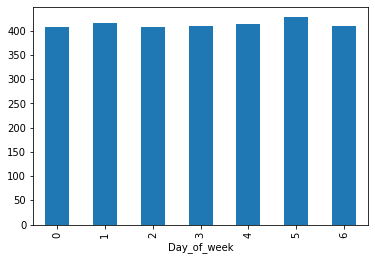

In [46]:
rundata.groupby('Day_of_week')['Avg_pace_secs'].mean().plot.bar()

## Average pace with moving averages

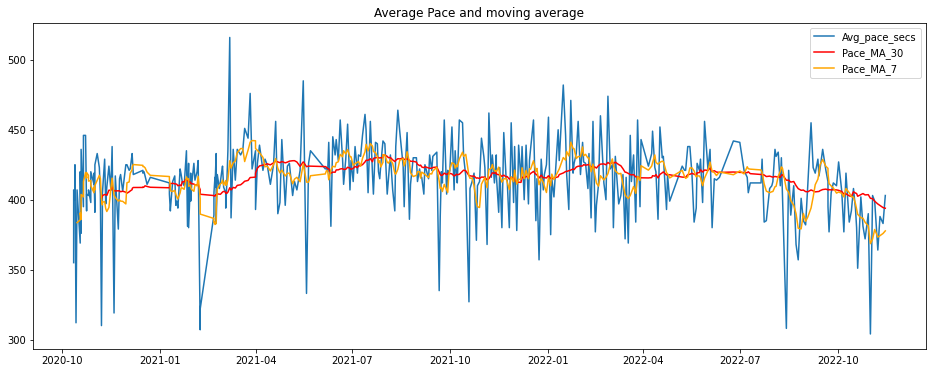

In [47]:
plt.figure(figsize=(16,6))
plt.title("Average Pace and moving average")
plt.plot(rundata['Date'],rundata['Avg_pace_secs'],label='avg pace')
plt.plot(rundata['Date'],rundata['Pace_MA_30'],label='mov avg 30', color='red') #linestyle="-."
plt.plot(rundata['Date'],rundata['Pace_MA_7'],label='mov avg 7',color='orange')
plt.legend(['Avg_pace_secs','Pace_MA_30','Pace_MA_7'])
plt.show()

## Distance with moving average

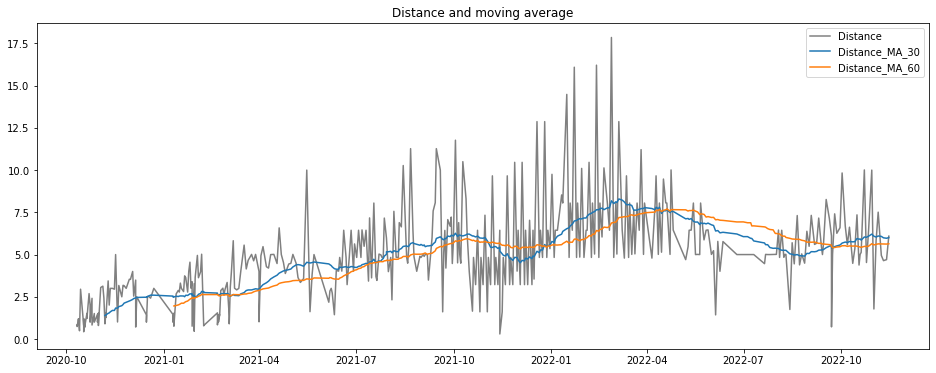

In [48]:
plt.figure(figsize=(16,6))
plt.title("Distance and moving average")
plt.plot(rundata['Date'],rundata['Distance'],label='distance',color='grey')
plt.plot(rundata['Date'],rundata['Distance_MA_30'],label = 'MA 30 days')
plt.plot(rundata['Date'],rundata['Distance_MA_60'],label = 'MA 60 days')
plt.legend(['Distance','Distance_MA_30','Distance_MA_60'])
plt.show()

## HR with moving average

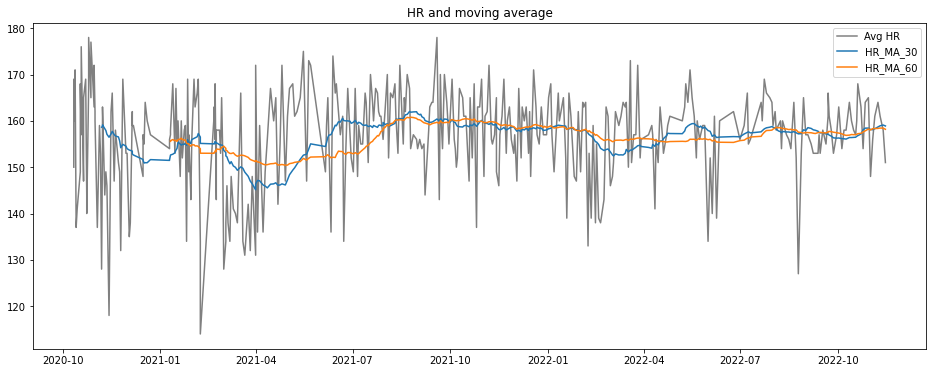

In [49]:
plt.figure(figsize=(16,6))
plt.title("HR and moving average")
plt.plot(rundata['Date'],rundata['Avg HR'],label='distance',color='grey')
plt.plot(rundata['Date'],rundata['Avg_HR_MA_30'],label = 'HR 30 days')
plt.plot(rundata['Date'],rundata['Avg_HR_MA_60'],label = 'HR 60 days')
plt.legend(['Avg HR','HR_MA_30','HR_MA_60'])
plt.show()

## Histogram of average pace

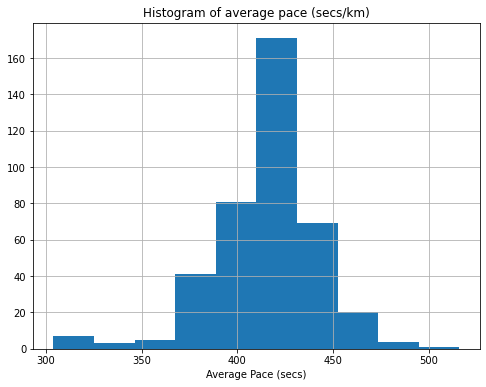

In [50]:
plt.figure(figsize=(8,6))
plt.title('Histogram of average pace (secs/km)')
plt.xlabel('Average Pace (secs)')
plt.hist(rundata['Avg_pace_secs'])
plt.grid()
plt.show()

# With Density

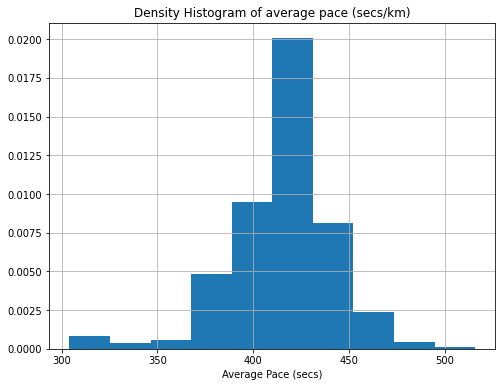

In [52]:
plt.figure(figsize=(8,6))
plt.title('Density Histogram of average pace (secs/km)')
plt.xlabel('Average Pace (secs)')
plt.hist(rundata['Avg_pace_secs'], density=True)
plt.grid()
plt.show()

## Histogram of HR

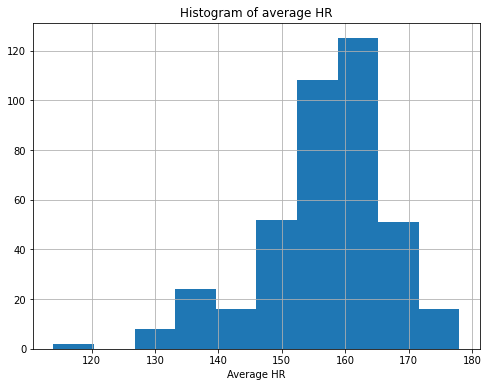

In [53]:
plt.figure(figsize=(8,6))
plt.title('Histogram of average HR')
plt.xlabel('Average HR')
plt.hist(rundata['Avg HR'])
plt.grid()
plt.show()

In [54]:
rundata[desc_cols].corr()

,Distance,Avg HR,Total Descent,Max HR,Avg Run Cadence,Max Run Cadence,Avg Stride Length,Time_in_secs,Avg_pace_secs,Calories,Best_pace_secs
Distance,1.000000,0.262555,0.518621,0.277700,-0.128812,0.050322,-0.492474,0.994492,0.488405,0.988259,0.390914
Avg HR,0.262555,1.000000,0.074288,0.841476,0.036416,-0.175300,-0.308625,0.262145,0.229562,0.338882,0.250184
Total Descent,0.518621,0.074288,1.000000,0.115177,-0.088223,0.111445,-0.280176,0.514402,0.302214,0.508648,0.126703
Max HR,0.277700,0.841476,0.115177,1.000000,-0.005131,-0.112563,-0.280537,0.268056,0.211477,0.340620,0.252461
Avg Run Cadence,-0.128812,0.036416,-0.088223,-0.005131,1.000000,-0.000767,0.247190,-0.169406,-0.568117,-0.122554,-0.048173
Max Run Cadence,0.050322,-0.175300,0.111445,-0.112563,-0.000767,1.000000,0.256950,0.020678,-0.217428,0.018696,-0.343173
Avg Stride Length,-0.492474,-0.308625,-0.280176,-0.280537,0.247190,0.256950,1.000000,-0.540121,-0.914334,-0.540867,-0.413845
Time_in_secs,0.994492,0.262145,0.514402,0.268056,-0.169406,0.020678,-0.540121,1.000000,0.550528,0.989699,0.403072
Avg_pace_secs,0.488405,0.229562,0.302214,0.211477,-0.568117,-0.217428,-0.914334,0.550528,1.000000,0.533118,0.370585
Calories,0.988259,0.338882,0.508648,0.340620,-0.122554,0.018696,-0.540867,0.989699,0.533118,1.000000,0.402576


[Text(0.5, 1.0, 'Avg Pace vs Distance')]

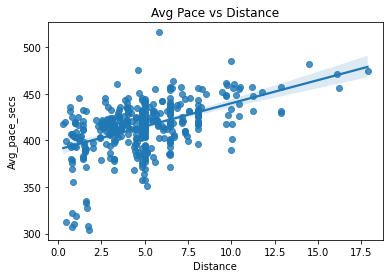

In [55]:
sns.regplot(x='Distance',y='Avg_pace_secs',data=rundata, fit_reg=True).set(title='Avg Pace vs Distance')

## Histogram of Avg Run Cadence

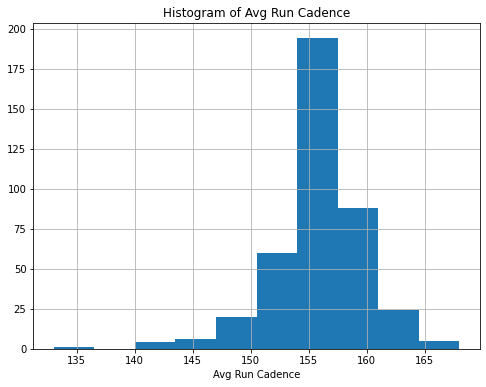

In [56]:
plt.figure(figsize=(8,6))
plt.title('Histogram of Avg Run Cadence')
plt.xlabel('Avg Run Cadence')
plt.grid()
plt.hist(rundata['Avg Run Cadence'])
plt.show()

## Histogram of Distance

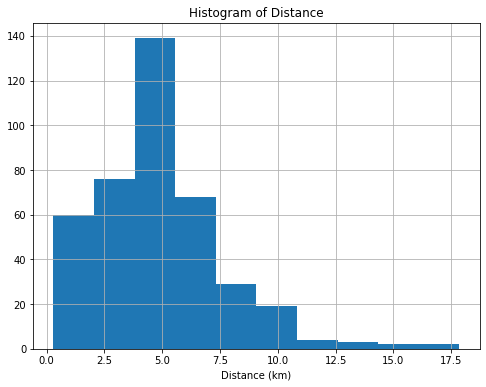

In [57]:
plt.figure(figsize=(8,6))
plt.title('Histogram of Distance')
plt.xlabel('Distance (km)')
plt.grid()
plt.hist(rundata['Distance'])
plt.show()

In [58]:
rundata['Distance'].value_counts().head(10)

4.83    28
6.44    24
5.01    20
5.00    17
8.05    16
3.22    13
3.00     7
4.00     5
1.00     5
6.45     4
Name: Distance, dtype: int64

## Histogram of calories

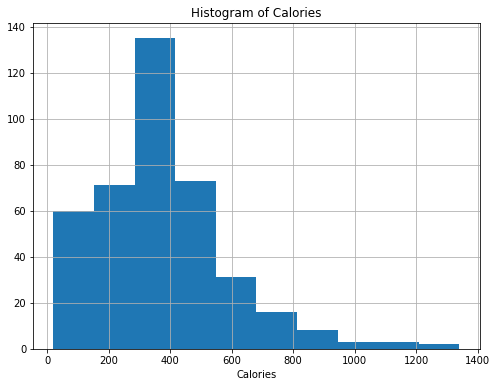

In [59]:
plt.figure(figsize=(8,6))
plt.title('Histogram of Calories')
plt.xlabel('Calories')
plt.grid()
plt.hist(rundata['Calories'])
plt.show()

# Summaries

## Fastest runs

In [60]:
def print_best_perf(data: pd.DataFrame,distance: float, n=int):
    """
    Function that prints best performances based on distance and number of runs
    @data: dataset
    @param distance: Distance of the run
    @param n: number of top performances
    """
    print('Fastest {}k runs: '.format(distance))
    print()
    print(data[(data['Distance']<=distance+0.01) & (data['Distance']>=distance-0.01)].sort_values(by=['Avg_pace_secs']).head(n)[['Date','Distance','Time','Avg Pace']])
    print()


In [61]:
print_best_perf(rundata,6.44,3)

Fastest 6.44k runs: 

                   Date  Distance      Time Avg Pace
393 2022-10-26 17:59:56      6.45  00:40:01     6:12
303 2022-03-24 19:00:49      6.44  00:41:14     6:24
183 2021-08-23 17:08:37      6.44  00:41:22     6:26



In [62]:
main_distances = [3.22,4.83,5,6.44,8.05,10]

In [63]:
for i in main_distances:
    print_best_perf(rundata,i,3)

Fastest 3.22k runs: 

                   Date  Distance      Time Avg Pace
226 2021-11-04 19:22:22      3.22  00:19:43     6:08
243 2021-12-02 18:09:48      3.22  00:20:15     6:18
235 2021-11-18 18:15:35      3.22  00:20:24     6:20

Fastest 4.83k runs: 

                   Date  Distance      Time Avg Pace
255 2021-12-23 17:57:55      4.83  00:28:41     5:57
297 2022-03-14 18:37:06      4.83  00:29:57     6:12
261 2022-01-03 16:32:55      4.83  00:30:11     6:15

Fastest 5k runs: 

                   Date  Distance      Time Avg Pace
299 2022-03-17 18:24:05      5.01  00:30:50     6:09
377 2022-09-22 19:20:38      5.01  00:31:28     6:17
389 2022-10-18 18:03:02      5.01  00:31:40     6:20

Fastest 6.44k runs: 

                   Date  Distance      Time Avg Pace
393 2022-10-26 17:59:56      6.45  00:40:01     6:12
303 2022-03-24 19:00:49      6.44  00:41:14     6:24
183 2021-08-23 17:08:37      6.44  00:41:22     6:26

Fastest 8.05k runs: 

                   Date  Distance      Ti

## Totals and averages

In [64]:
print('Total calories burnt: ' + str(rundata['Calories'].sum()))
print('Total distance run: ' + str(round(rundata['Distance'].sum(),1)))
print('Average pace (km): ' + str(round(rundata['Avg_pace_secs'].mean(),2)))
print('Average heart rate: ' + str(round(rundata['Avg HR'].mean(),2)))
print('Longest distance run: ' + str(rundata['Distance'].max()))

Total calories burnt: 149435
Total distance run: 1971.6
Average pace (km): 414.6
Average heart rate: 156.68
Longest distance run: 17.85
